In [105]:
import sqlite3
import pandas as pd
conn= sqlite3.connect('factbook.db')
q= "SELECT  * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [16]:
cursor= conn.cursor()
cursor.execute(q).fetchall()

[('table',
  'facts',
  'facts',
  2,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float, "created_at" datetime, "updated_at" datetime)'),
 ('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)')]

In [37]:
q1= "SELECT * FROM facts"# limit 5"
data = pd.read_sql_query(q1,conn)
#data

In [28]:
def sql():
    sql_input = "SELECT * \
                 FROM facts \
                 WHERE name = 'Angola' \
                 "
    return sql_input

def get_data():
    eng = sqlite3.connect('factbook.db')
    sql_input = sql()
    sql_input = " ".join(sql_input.split())
    data = pd.read_sql(sql_input, eng)
    return data

data = get_data()

display(data)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [56]:
data2 = data['name'].str.contains('An',
                         regex=True,
                         na=False).value_counts().to_frame().rename_axis('Cat')

data2

,name
Cat,
False,255
True,6


nested queries

In [62]:
q3= '''
    SELECT * FROM facts WHERE population==(SELECT max(population) FROM facts)
'''
pd.read_sql_query(q3,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


/opt/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if sys.path[0] == '':


array([[<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'population_growth'}>],
       [<AxesSubplot:title={'center':'birth_rate'}>,
        <AxesSubplot:title={'center':'death_rate'}>]], dtype=object)

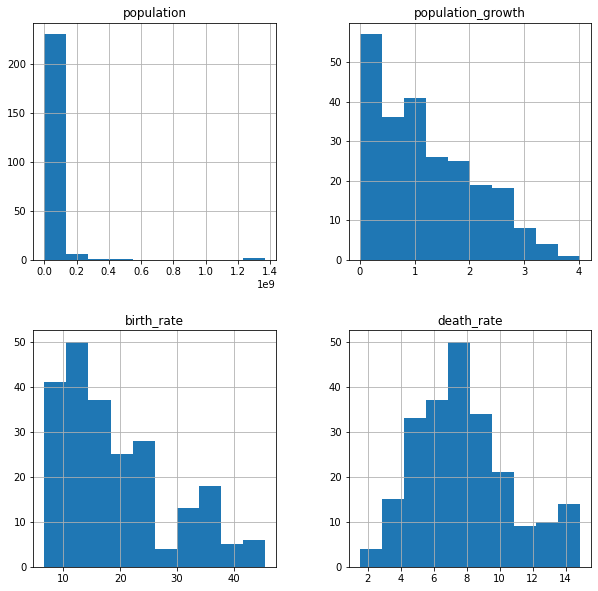

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
q5 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(q5, conn).hist(ax=ax)

In [106]:
q6='''
SELECT name FROM sqlite_master  
  WHERE type="table"'''
pd.read_sql_query(q6, conn)

,name
0,facts
1,sqlite_sequence


In [99]:
conn.close()

In [300]:
#%%capture
#%load_ext sql
%sql sqlite:///company.db


In [301]:
%sql PRAGMA database_list;


 * sqlite:///company.db
Done.


seq,name,file
0,main,/Users/dominic.mckean/Library/CloudStorage/OneDrive-SecureEngineering/notebooks/company.db


In [140]:
%sql SELECT * FROM facts limit 5

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
2,al,Albania,28748,27398,1350,3029278,0.3,12.92,6.58,3.3,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.0,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [298]:
%sql -x / --close sqlite:///students.db

In [165]:
%%sql

CREATE TABLE student(
    sudent_id INT PRIMARY KEY,
    name VARCHARE(20),
    major VARCHARE(20)
    
);

 * sqlite:///students.db
Done.


[]

In [250]:
%%sql

CREATE TABLE student(
    student_id INTEGER NOT NULL PRIMARY KEY,
    name VARCHARE(20),
    major VARCHARE(20)
);

 * sqlite:///students.db
Done.


[]

In [249]:
%%sql

DROP TABLE student;

 * sqlite:///students.db
Done.


[]

In [187]:
%sql ALTER TABLE student ADD gpa DECIMAL(3, 2);

 * sqlite:///students.db
Done.


[]

In [190]:
%sql ALTER TABLE student DROP COLUMN gpa;

 * sqlite:///students.db
Done.


[]

In [251]:

%sql INSERT INTO student VALUES(NULL, 'Jake', 'Biology');
%sql INSERT INTO student VALUES(NULL, 'Kate', 'Sociology');
#%sql INSERT INTO student VALUES(3, 'Claire', NULL);
#%sql INSERT INTO student(name, major) VALUES('Mike', 'Computer Science');
#%sql INSERT INTO student VALUES(5, 'Mike', 'Computer Science');

 * sqlite:///students.db
1 rows affected.
 * sqlite:///students.db
1 rows affected.


[]

In [284]:
%sql SELECT * FROM student;

 * sqlite:///students.db
Done.


student_id,name,major
1,Jake,Bio
2,Kate,Sociology


In [283]:
%%sql

UPDATE student
SET major = 'Bio'
WHERE major = 'Biology'

 * sqlite:///students.db
1 rows affected.


[]

In [325]:
%sql PRAGMA database_list;


 * sqlite:///company.db
Done.


seq,name,file
0,main,/Users/dominic.mckean/Library/CloudStorage/OneDrive-SecureEngineering/notebooks/company.db


In [336]:
%sql PRAGMA table_info(branch);


 * sqlite:///company.db
Done.


cid,name,type,notnull,dflt_value,pk
0,branch_id,INT,0,None,1
1,branch_name,VARCHAR(40),0,None,0
2,mgr_id,INT,0,None,0
3,mgr_start_date,DATE,0,None,0


In [365]:
for i in range(len(!sqlite3 company.db .table)):
    !sqlite3 company.db .table



branch           client           works_with     
branch_supplier  employee       


In [314]:
!sqlite3 company.db """ALTER TABLE employee \
                        ADD FOREIGN KEY(branch_id) \
                        REFERENCES branch(branch_id) \
                        ON DELETE SET NULL; \
                        """

Error: in prepare, near "FOREIGN": syntax error
  ALTER TABLE employee  ADD FOREIGN KEY(branch_id)  REFERENCES branch(branch_id)
              error here ---^


In [334]:
%%sql

CREATE TABLE employee (
  emp_id INT PRIMARY KEY,
  first_name VARCHAR(40),
  last_name VARCHAR(40),
  birth_day DATE,
  sex VARCHAR(1),
  salary INT,
  super_id INT,
  branch_id INT,
    FOREIGN KEY(branch_id)
    REFERENCES branch(branch_id)
    ON DELETE SET NULL,
    FOREIGN KEY(super_id)
    REFERENCES employee(emp_id)
    ON DELETE SET NULL
);

CREATE TABLE branch (
  branch_id INT PRIMARY KEY,
  branch_name VARCHAR(40),
  mgr_id INT,
  mgr_start_date DATE,
  FOREIGN KEY(mgr_id) REFERENCES employee(emp_id) ON DELETE SET NULL
);


CREATE TABLE client (
  client_id INT PRIMARY KEY,
  client_name VARCHAR(40),
  branch_id INT,
  FOREIGN KEY(branch_id) REFERENCES branch(branch_id) ON DELETE SET NULL
);

CREATE TABLE works_with (
  emp_id INT,
  client_id INT,
  total_sales INT,
  PRIMARY KEY(emp_id, client_id),
  FOREIGN KEY(emp_id) REFERENCES employee(emp_id) ON DELETE CASCADE,
  FOREIGN KEY(client_id) REFERENCES client(client_id) ON DELETE CASCADE
);

CREATE TABLE branch_supplier (
  branch_id INT,
  supplier_name VARCHAR(40),
  supply_type VARCHAR(40),
  PRIMARY KEY(branch_id, supplier_name),
  FOREIGN KEY(branch_id) REFERENCES branch(branch_id) ON DELETE CASCADE
);

 * sqlite:///company.db
Done.
Done.
Done.
Done.
Done.


[]

In [337]:
%%sql
-- -----------------------------------------------------------------------------

-- Corporate
INSERT INTO employee VALUES(100, 'David', 'Wallace', '1967-11-17', 'M', 250000, NULL, NULL);

INSERT INTO branch VALUES(1, 'Corporate', 100, '2006-02-09');

UPDATE employee
SET branch_id = 1
WHERE emp_id = 100;

INSERT INTO employee VALUES(101, 'Jan', 'Levinson', '1961-05-11', 'F', 110000, 100, 1);

-- Scranton
INSERT INTO employee VALUES(102, 'Michael', 'Scott', '1964-03-15', 'M', 75000, 100, NULL);

INSERT INTO branch VALUES(2, 'Scranton', 102, '1992-04-06');

UPDATE employee
SET branch_id = 2
WHERE emp_id = 102;

INSERT INTO employee VALUES(103, 'Angela', 'Martin', '1971-06-25', 'F', 63000, 102, 2);
INSERT INTO employee VALUES(104, 'Kelly', 'Kapoor', '1980-02-05', 'F', 55000, 102, 2);
INSERT INTO employee VALUES(105, 'Stanley', 'Hudson', '1958-02-19', 'M', 69000, 102, 2);

-- Stamford
INSERT INTO employee VALUES(106, 'Josh', 'Porter', '1969-09-05', 'M', 78000, 100, NULL);

INSERT INTO branch VALUES(3, 'Stamford', 106, '1998-02-13');

UPDATE employee
SET branch_id = 3
WHERE emp_id = 106;

INSERT INTO employee VALUES(107, 'Andy', 'Bernard', '1973-07-22', 'M', 65000, 106, 3);
INSERT INTO employee VALUES(108, 'Jim', 'Halpert', '1978-10-01', 'M', 71000, 106, 3);


-- BRANCH SUPPLIER
INSERT INTO branch_supplier VALUES(2, 'Hammer Mill', 'Paper');
INSERT INTO branch_supplier VALUES(2, 'Uni-ball', 'Writing Utensils');
INSERT INTO branch_supplier VALUES(3, 'Patriot Paper', 'Paper');
INSERT INTO branch_supplier VALUES(2, 'J.T. Forms & Labels', 'Custom Forms');
INSERT INTO branch_supplier VALUES(3, 'Uni-ball', 'Writing Utensils');
INSERT INTO branch_supplier VALUES(3, 'Hammer Mill', 'Paper');
INSERT INTO branch_supplier VALUES(3, 'Stamford Lables', 'Custom Forms');

-- CLIENT
INSERT INTO client VALUES(400, 'Dunmore Highschool', 2);
INSERT INTO client VALUES(401, 'Lackawana Country', 2);
INSERT INTO client VALUES(402, 'FedEx', 3);
INSERT INTO client VALUES(403, 'John Daly Law, LLC', 3);
INSERT INTO client VALUES(404, 'Scranton Whitepages', 2);
INSERT INTO client VALUES(405, 'Times Newspaper', 3);
INSERT INTO client VALUES(406, 'FedEx', 2);

-- WORKS_WITH
INSERT INTO works_with VALUES(105, 400, 55000);
INSERT INTO works_with VALUES(102, 401, 267000);
INSERT INTO works_with VALUES(108, 402, 22500);
INSERT INTO works_with VALUES(107, 403, 5000);
INSERT INTO works_with VALUES(108, 403, 12000);
INSERT INTO works_with VALUES(105, 404, 33000);
INSERT INTO works_with VALUES(107, 405, 26000);
INSERT INTO works_with VALUES(102, 406, 15000);
INSERT INTO works_with VALUES(105, 406, 130000);

 * sqlite:///company.db
Done.
1 rows affected.
1 rows affected.
1 rows affected.
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [359]:
for table in bob:
    print(%sql SELECT * FROM table)


SyntaxError: invalid syntax (<ipython-input-359-89aae9300c35>, line 2)

In [362]:
def sql(table):
    sql_input = """SELECT * 
                   FROM (?)
                 """, (table)
    return sql_input

def get_data(table):
    print(table)
    eng = sqlite3.connect('factbook.db')
    sql_input = sql(table)
    print(sql_input)
    sql_input = " ".join(sql_input.split())
    data = pd.read_sql(sql_input, eng)
    return data

for table in bob:
    data = get_data(table)
    display(data)

display(data)

branch           client           works_with     
('SELECT * \n                   FROM (?)\n                 ', 'branch           client           works_with     ')


AttributeError: 'tuple' object has no attribute 'split'

In [ ]:
SELECT * 
FROM crm
WHERE CRM.

string reversals for interview 

In [260]:
s = "hello world"#[::-1]

In [265]:
''.join(reversed(s))

'dlrow olleh'

In [267]:
def rev_string(s): 
    if len(s) == 1:
        return s

    return s[-1] + rev_string(s[:-1])
rev_string('dom is awesome')

'emosewa si mod'

In [281]:
s = s[-1] + s[:-1]
s

'hello world'

In [295]:
bob = {'a': [1,1,1,'*',2,2,2,2,2,2,2,3,3,3,3,3,4,4,4,4,'d','d'],
      'b': [2312,31321,123123,43534,545435,4353,453,65765,78978,
            464,3534,756,3535,7567,98090,9008,6788,354,23423,42542,6456,90]}
bob = pd.DataFrame(bob)
display(bob)
cat = bob.groupby(['a']).agg({'b': ['count']})
cat

,a,b
0,1,2312
1,1,31321
2,1,123123
3,*,43534
4,2,545435
5,2,4353
6,2,453
7,2,65765
8,2,78978
9,2,464


,b
,count
a,
1,3
2,7
3,5
4,4
*,1
d,2
